<a href="https://colab.research.google.com/github/hungryphobic/NLP-projects/blob/main/P4_TwitterSentimentAnalysisMalayLanguage_SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sentiment Analysis**
---

# I) Introduction 
supervised classificatiion task
the idea:

### 1. Logistic Regression
Logistic regression models the probabilities for classification problems with two possible outcomes. It's an extension of the linear regression model for classification problems.The linear regression model can work well for regression, but fails for classification.
A solution for classification is logistic regression. Instead of fitting a straight line or hyperplane, the logistic regression model uses the logistic function to squeeze the output of a linear equation between 0 and 1. The logistic function is defined as:

> ## $logistic(n) = \frac{1}{1 + exp(-n)} $
 
### 2. Naive bayes
The Naive Bayes classifier uses the Bayes' theorem of conditional probabilities. For each feature, it calculates the probability for a class depending on the value of the feature. The Naive Bayes classifier calculates the class probabilities for each feature independently, which is equivalent to a strong (= naive) assumption of conditional independence of the features. Naive Bayes is a conditional probability model and models the probability of a class $C_{k}$ as follows:

> ## $ P(C_{k}|x) = \frac{1}{z}\ P(C_{k})\ \prod_{i=1}^{n}\  P(x_{i}|C_{k}) $

 
### 3. Decision Tree (DT)
Linear regression and logistic regression models fail in situations where the relationship between features and outcome is nonlinear or where features interact with each other. So, supposedly DT can address that.Tree based models split the data multiple times according to certain cutoff values in the features. Through splitting, different subsets of the dataset are created, with each instance belonging to one subset. The final subsets are called terminal or leaf nodes and the intermediate subsets are called internal nodes or split nodes. To predict the outcome in each leaf node, the average outcome of the training data in this node is used. Trees can be used for classification and regression.

The following formula describes the relationship between the outcome y and features x.:

> ## $\hat{y} = \hat{f}(x) = \sum_{m=1}^{M} c_{m}I \{x \in R_{m} \}$ 

> Each instance falls into exactly one leaf node (=subset  $R_{m})$ . $I \{x\in R_{m}\}$ is the identity function that returns 1 if $x$ is in the subset $ R_{m}$ and 0 otherwise. If an instance falls into a leaf node $R_{t}$ the predicted outcome is $\hat{y} = c_{l}$ where $c_{l}$  is the average of all training instances in leaf node $R_{t}$.

---

# 1) Start Classification Task using Interpretable Machine Learning Models

##  1.1) Import Required Packages and Modules

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import  tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})

## 1.2) Step-by-Step Example with Logistic Regression

### 1.2.1) Load dataset

In [ ]:
fp0 = '/content/drive/MyDrive/Colab Notebooks/tweets_data/for feature extraction/clean dataset/vectorized/tfidf/'
fp1 = fp0+str(1)+'.csv'
data = pd.read_csv(fp1,index_col= None)

In [ ]:
(r,c) = data.shape
x = data.iloc[:,0:(c-1)]
y = data.iloc[:, (c-1):]

### 1.2.2) Splitting Data

In [ ]:
feature_train, feature_test, target_train, target_test = train_test_split(x,y, test_size = 0.3, random_state = 42)

In [ ]:
print(feature_train.shape)
print(feature_test.shape)
print(target_train.shape)
print(target_test.shape)

(58, 106)
(25, 106)
(58, 1)
(25, 1)


### 1.2.3) Set up Models

In [ ]:
logR_model = LogisticRegression(
    C=0.5, 
    class_weight="balanced", 
    penalty='l2',
    intercept_scaling=1,
    solver='liblinear',
    max_iter=90, 
    verbose=10)

### 1.2.4) Fitting Models and Do Prediction 

In [ ]:
logR_model.fit(feature_train,target_train)
target_pred = logR_model.predict(feature_test)
target_pred

[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([ 1, -1, -1,  1,  0,  0, -1,  1,  0,  0,  1,  0, -1,  1, -1,  1,  1,
       -1,  0,  1,  0,  0,  1,  1, -1])

### 1.2.5) Evaluation

In [ ]:
print('Accuracy score : '+str( accuracy_score(target_test,target_pred)))

Accuracy score : 0.56


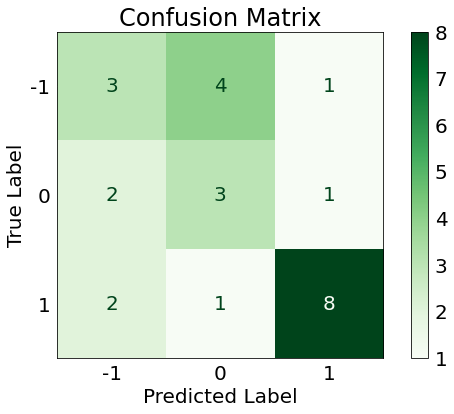

In [ ]:
matrix = plot_confusion_matrix(logR_model,feature_test, target_test, cmap= plt.cm.Greens)
matrix.ax_.set_title('Confusion Matrix', color='black')
plt.xlabel('Predicted Label', color='black')
plt.ylabel('True Label', color='black')
plt.gcf().axes[0].tick_params(color='white')
plt.gcf().axes[1].tick_params(color='white')
plt.gcf().set_size_inches(10,6)
plt.show()

## 1.3-1) multipleDataClassification(min_file,max_file,models)

> tfidf as input

In [ ]:
def multipleDataClassification(min_file,max_file,models):
  fp0 = '/content/drive/MyDrive/Colab Notebooks/tweets_data/for feature extraction/clean dataset/vectorized/tfidf/'
  
  for i in range(min_file,max_file+1):
    print('\n===================== Dataset '+str(i)+' =====================')
    fp1 = fp0+str(i)+'.csv'
    data = pd.read_csv(fp1,index_col= None)
    #assign data for splitting
    (r,c) = data.shape
    x = data.iloc[:,0:(c-1)]
    y = data.iloc[:, (c-1):]
    #splititng data
    feature_train, feature_test, target_train, target_test = train_test_split(x,y, test_size = 0.3, random_state = 42)
    
    #Fitting Models and Do Prediction
    models.fit(feature_train,target_train)
    target_pred = models.predict(feature_test)

    #print accuracy score
    print('Accuracy score of dataset'+str(i)+' is :'+str( accuracy_score(target_test,target_pred)))

    #view confusion matrix
    matrix = plot_confusion_matrix(models,feature_test, target_test, cmap= plt.cm.Greens)
    matrix.ax_.set_title('Confusion Matrix for dataset '+str(i), color='black')
    plt.xlabel('Predicted Label', color='black')
    plt.ylabel('True Label', color='black')
    plt.gcf().axes[0].tick_params(color='white')
    plt.gcf().axes[1].tick_params(color='white')
    plt.gcf().set_size_inches(7,5)
    plt.show()
    

### Logistic Regression


===================== Dataset 1 =====================
[LibLinear]Accuracy score of dataset1 is :0.56


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


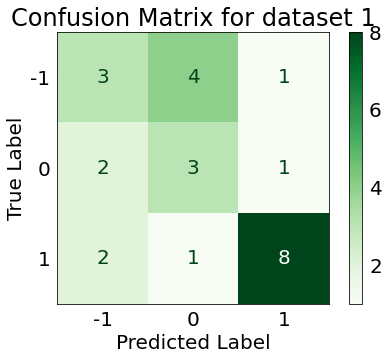


===================== Dataset 2 =====================
[LibLinear]Accuracy score of dataset2 is :0.46153846153846156


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


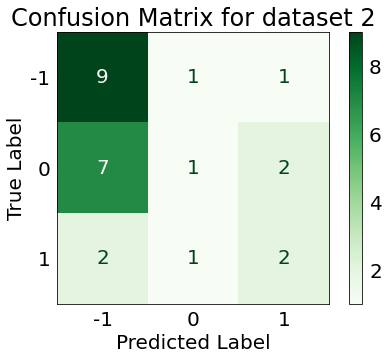


===================== Dataset 3 =====================
[LibLinear]Accuracy score of dataset3 is :0.36363636363636365


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


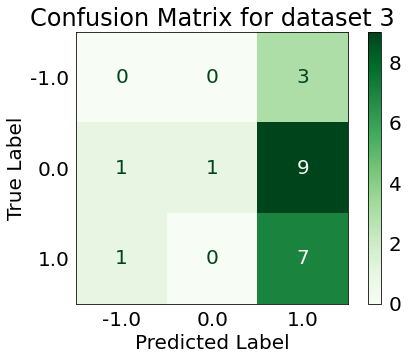


===================== Dataset 4 =====================
[LibLinear]Accuracy score of dataset4 is :0.5


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


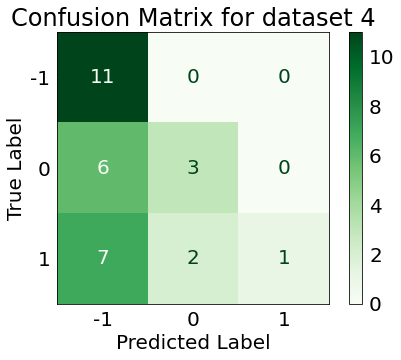

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



===================== Dataset 5 =====================
[LibLinear]Accuracy score of dataset5 is :0.8


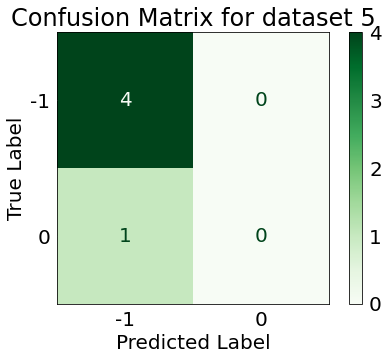


===================== Dataset 6 =====================
[LibLinear]Accuracy score of dataset6 is :0.6521739130434783


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


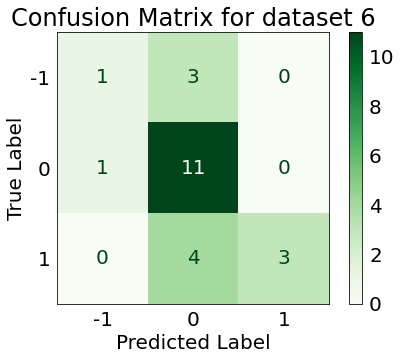


===================== Dataset 7 =====================
[LibLinear]Accuracy score of dataset7 is :0.6111111111111112


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


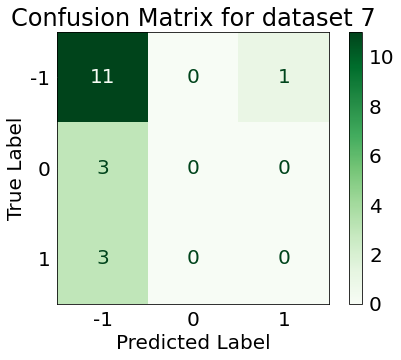


===================== Dataset 8 =====================
[LibLinear]Accuracy score of dataset8 is :0.5


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


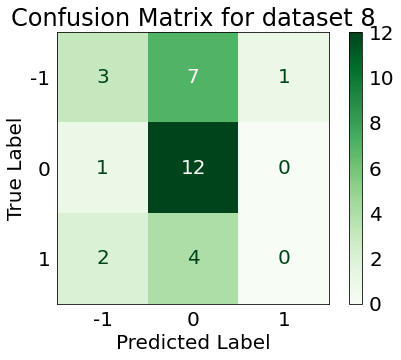


===================== Dataset 9 =====================
[LibLinear]Accuracy score of dataset9 is :0.5666666666666667


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


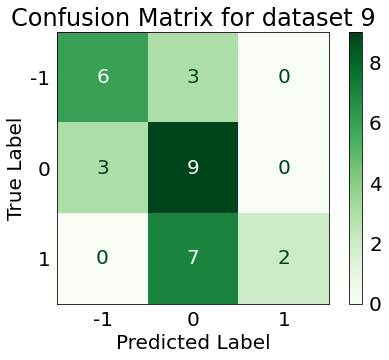

In [ ]:
multipleDataClassification(1,9,logR_model)

### Naive Bayes


===================== Dataset 1 =====================
Accuracy score of dataset1 is :0.6


/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


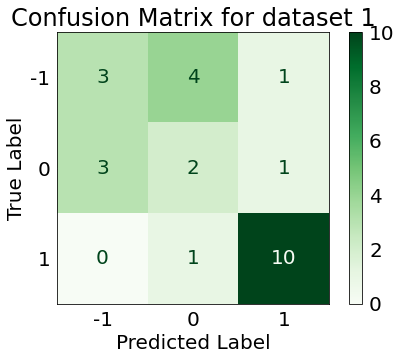


===================== Dataset 2 =====================
Accuracy score of dataset2 is :0.4230769230769231


/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


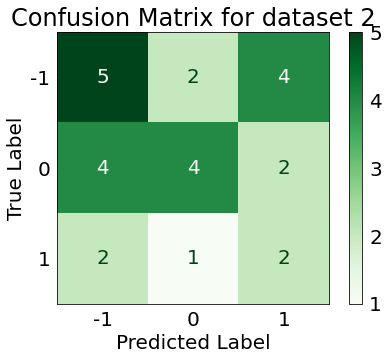


===================== Dataset 3 =====================


/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy score of dataset3 is :0.36363636363636365


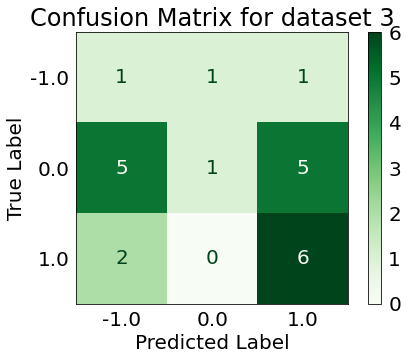


===================== Dataset 4 =====================
Accuracy score of dataset4 is :0.43333333333333335


/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


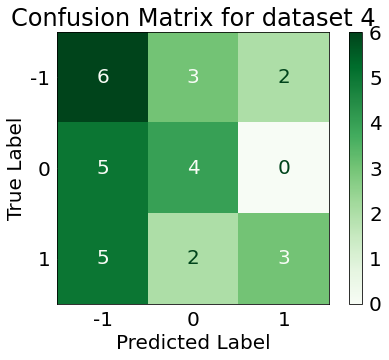

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



===================== Dataset 5 =====================
Accuracy score of dataset5 is :0.8


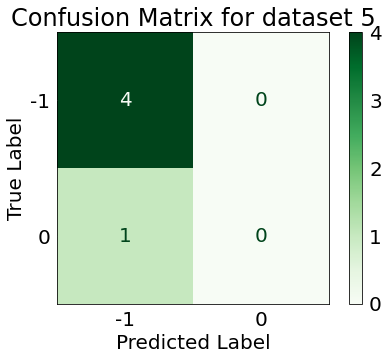


===================== Dataset 6 =====================


/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy score of dataset6 is :0.6086956521739131


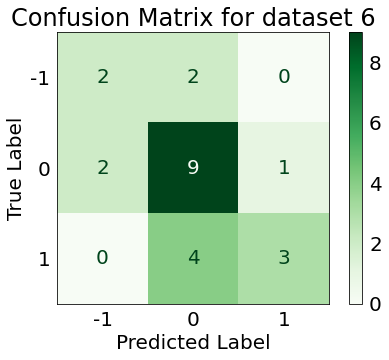


===================== Dataset 7 =====================
Accuracy score of dataset7 is :0.6111111111111112


/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


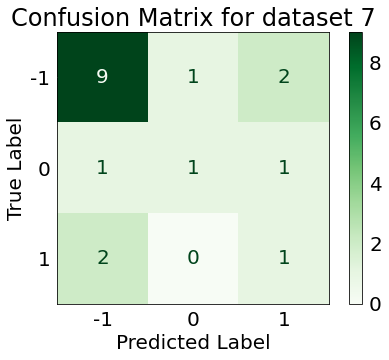


===================== Dataset 8 =====================


/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy score of dataset8 is :0.5


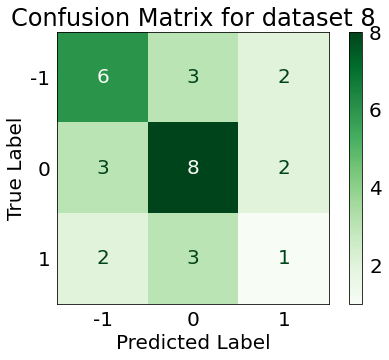


===================== Dataset 9 =====================
Accuracy score of dataset9 is :0.5666666666666667


/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


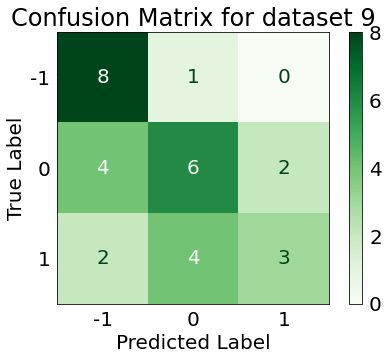

In [ ]:
#initialize naive Bayes classifier
gnb_models = GaussianNB()
multipleDataClassification(1,9,gnb_models)

### Random Forest


===================== Dataset 1 =====================
Accuracy score of dataset1 is :0.28


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


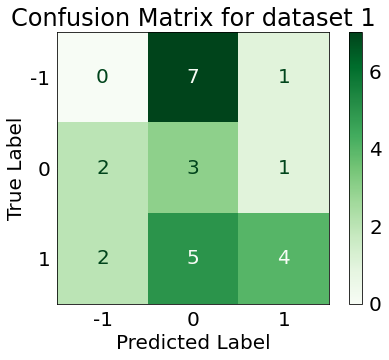


===================== Dataset 2 =====================
Accuracy score of dataset2 is :0.3076923076923077


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


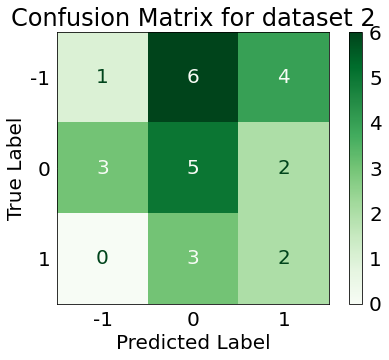


===================== Dataset 3 =====================
Accuracy score of dataset3 is :0.45454545454545453


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


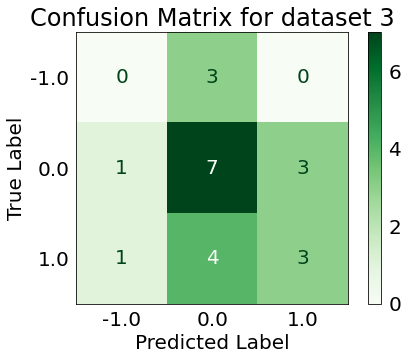


===================== Dataset 4 =====================
Accuracy score of dataset4 is :0.36666666666666664


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


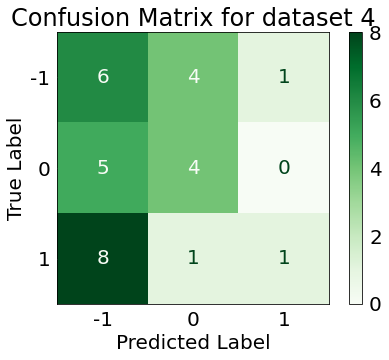


===================== Dataset 5 =====================
Accuracy score of dataset5 is :0.8


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


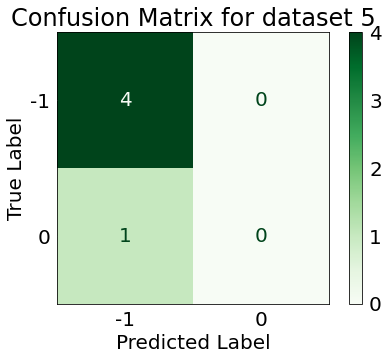


===================== Dataset 6 =====================
Accuracy score of dataset6 is :0.6086956521739131


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


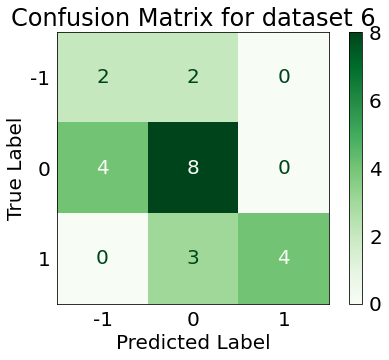


===================== Dataset 7 =====================
Accuracy score of dataset7 is :0.5555555555555556


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


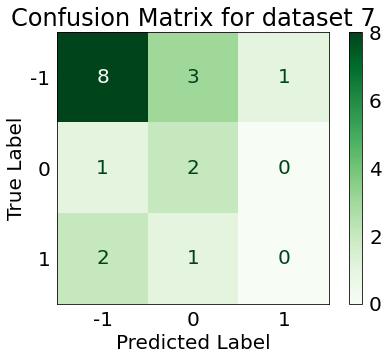


===================== Dataset 8 =====================
Accuracy score of dataset8 is :0.43333333333333335


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


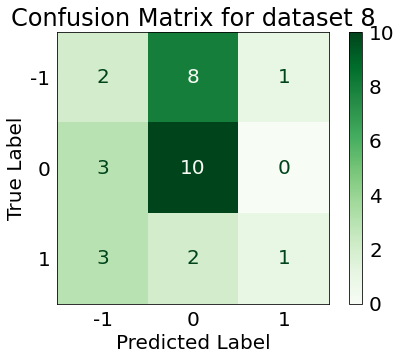


===================== Dataset 9 =====================
Accuracy score of dataset9 is :0.5333333333333333


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


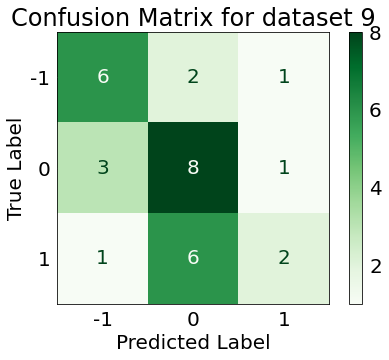

In [ ]:
rf_model = RandomForestClassifier()
multipleDataClassification(1,9,rf_model)

## 1.3-2) multipleDataClassification2(min_file,max_file,models)

> count vectorizer data as input

In [ ]:
def multipleDataClassification2(min_file,max_file,models):
  fp0 = '/content/drive/MyDrive/Colab Notebooks/tweets_data/for feature extraction/clean dataset/vectorized/count vectorizer/'
  
  for i in range(min_file,max_file+1):
    print('\n===================== Dataset '+str(i)+' =====================')
    fp1 = fp0+str(i)+'.csv'
    data = pd.read_csv(fp1,index_col= None)
    #assign data for splitting
    (r,c) = data.shape
    x = data.iloc[:,0:(c-1)]
    y = data.iloc[:, (c-1):]
    #splititng data
    feature_train, feature_test, target_train, target_test = train_test_split(x,y, test_size = 0.3, random_state = 42)
    
    #Fitting Models and Do Prediction
    models.fit(feature_train,target_train)
    target_pred = models.predict(feature_test)

    #print accuracy score
    print('Accuracy score of dataset'+str(i)+' is :'+str( accuracy_score(target_test,target_pred)))

    #view confusion matrix
    matrix = plot_confusion_matrix(models,feature_test, target_test, cmap= plt.cm.Greens)
    matrix.ax_.set_title('Confusion Matrix for dataset '+str(i), color='black')
    plt.xlabel('Predicted Label', color='black')
    plt.ylabel('True Label', color='black')
    plt.gcf().axes[0].tick_params(color='white')
    plt.gcf().axes[1].tick_params(color='white')
    plt.gcf().set_size_inches(7,5)
    plt.show()
    

### Logistic Regression


===================== Dataset 1 =====================
[LibLinear]Accuracy score of dataset1 is :0.48


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


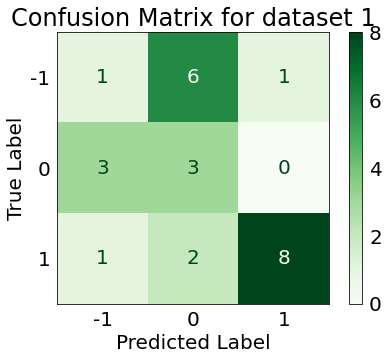


===================== Dataset 2 =====================
[LibLinear]Accuracy score of dataset2 is :0.5769230769230769


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


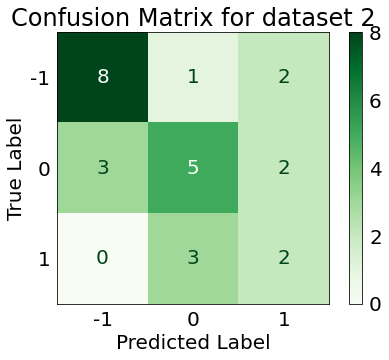


===================== Dataset 3 =====================
[LibLinear]Accuracy score of dataset3 is :0.4090909090909091


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


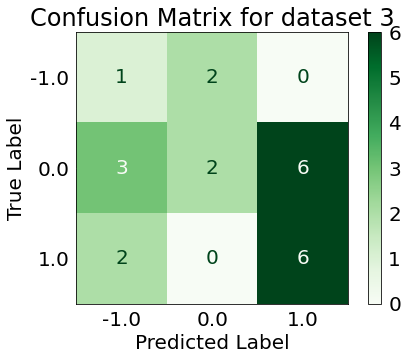


===================== Dataset 4 =====================
[LibLinear]Accuracy score of dataset4 is :0.5333333333333333


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


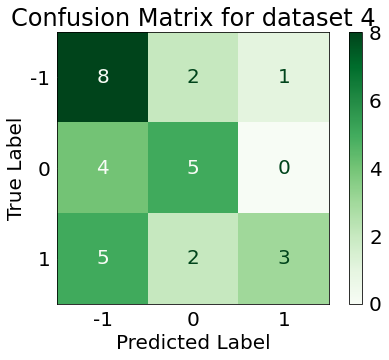

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



===================== Dataset 5 =====================
[LibLinear]Accuracy score of dataset5 is :0.4


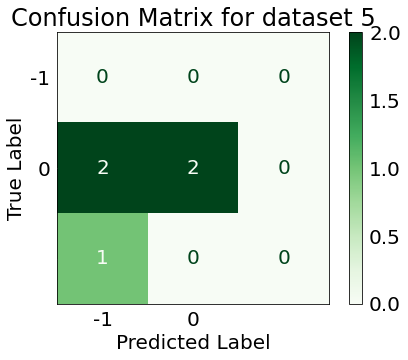


===================== Dataset 6 =====================
[LibLinear]Accuracy score of dataset6 is :0.6956521739130435


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


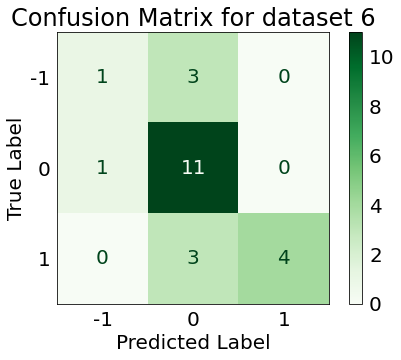


===================== Dataset 7 =====================
[LibLinear]Accuracy score of dataset7 is :0.5555555555555556


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


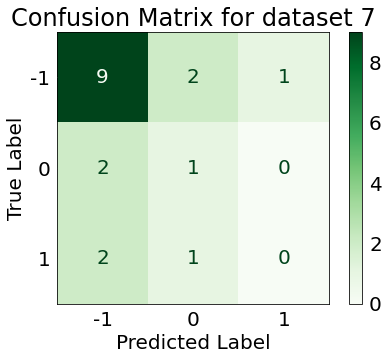


===================== Dataset 8 =====================
[LibLinear]Accuracy score of dataset8 is :0.5


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


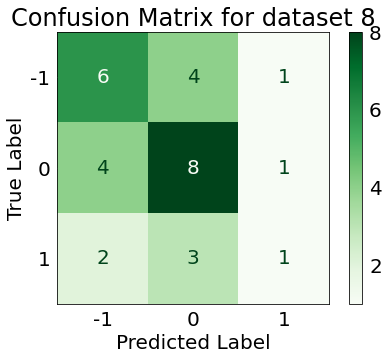


===================== Dataset 9 =====================
[LibLinear]Accuracy score of dataset9 is :0.6


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


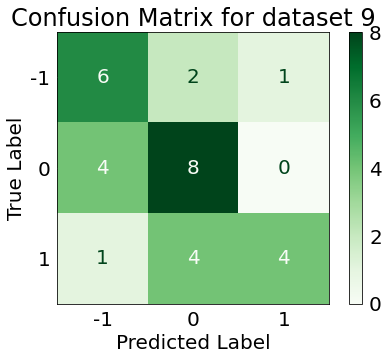

In [ ]:
logR_model2 = LogisticRegression(
    C=0.5, 
    class_weight="balanced", 
    penalty='l2',
    intercept_scaling=1,
    solver='liblinear',
    max_iter=100, 
    verbose=3)
multipleDataClassification2(1,9,logR_model2)

### Naive Bayes


===================== Dataset 1 =====================
Accuracy score of dataset1 is :0.6


/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


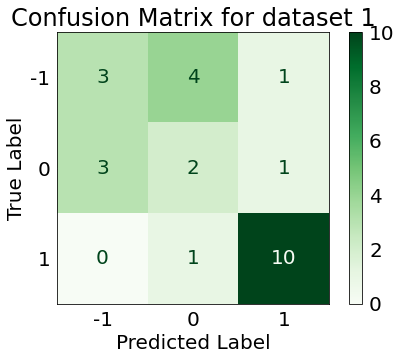


===================== Dataset 2 =====================
Accuracy score of dataset2 is :0.46153846153846156


/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


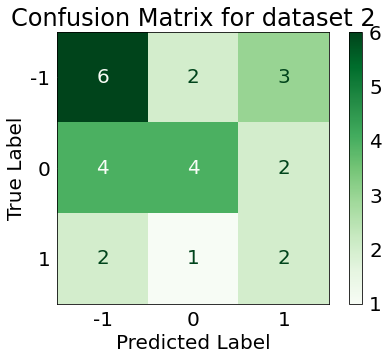


===================== Dataset 3 =====================


/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy score of dataset3 is :0.36363636363636365


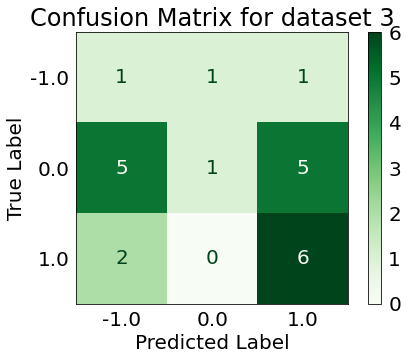


===================== Dataset 4 =====================
Accuracy score of dataset4 is :0.43333333333333335


/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


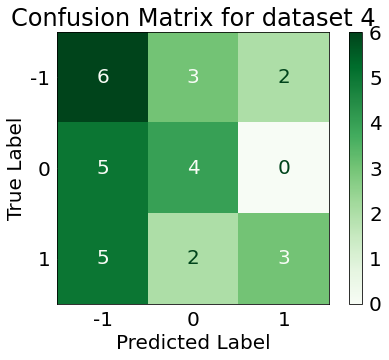


===================== Dataset 5 =====================
Accuracy score of dataset5 is :0.8


/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


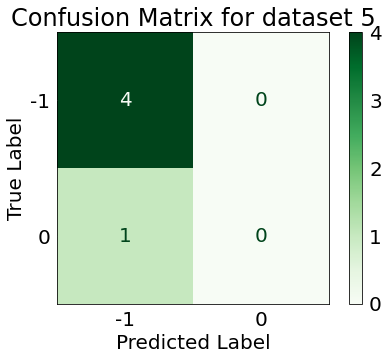


===================== Dataset 6 =====================
Accuracy score of dataset6 is :0.6521739130434783


/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


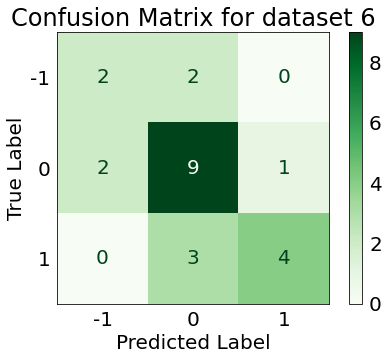


===================== Dataset 7 =====================
Accuracy score of dataset7 is :0.6111111111111112


/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


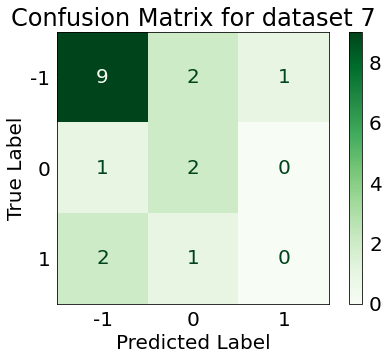


===================== Dataset 8 =====================
Accuracy score of dataset8 is :0.4666666666666667


/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


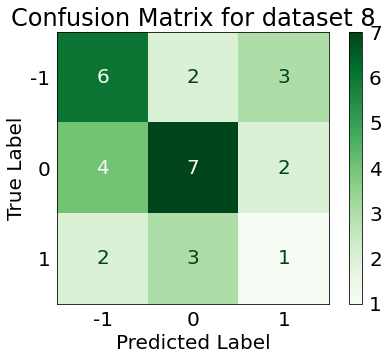


===================== Dataset 9 =====================
Accuracy score of dataset9 is :0.5666666666666667


/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


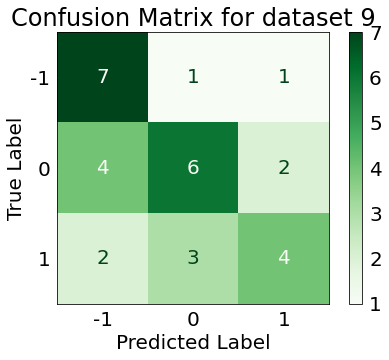

In [ ]:
gnb_model2 = GaussianNB()
multipleDataClassification2(1,9,gnb_model2)

### Random Forest


===================== Dataset 1 =====================
Accuracy score of dataset1 is :0.4


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


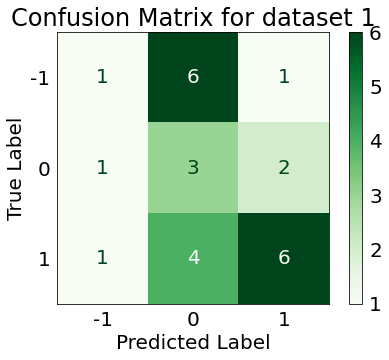


===================== Dataset 2 =====================
Accuracy score of dataset2 is :0.34615384615384615


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


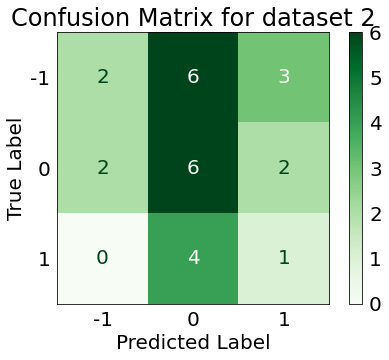


===================== Dataset 3 =====================
Accuracy score of dataset3 is :0.45454545454545453


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


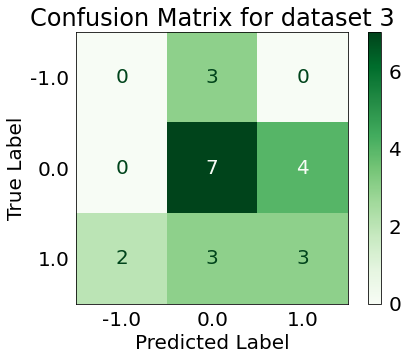


===================== Dataset 4 =====================
Accuracy score of dataset4 is :0.5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


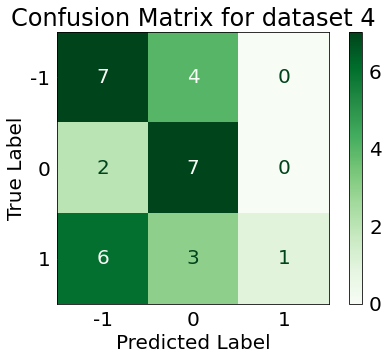


===================== Dataset 5 =====================
Accuracy score of dataset5 is :0.8


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


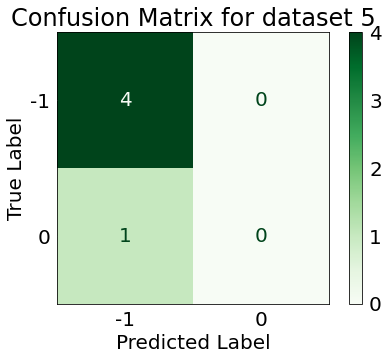


===================== Dataset 6 =====================
Accuracy score of dataset6 is :0.5652173913043478


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


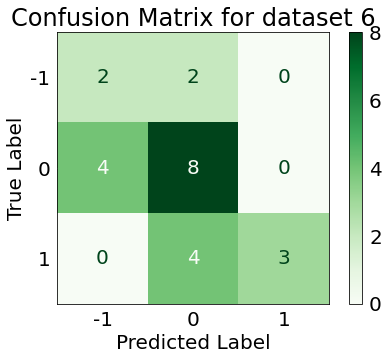


===================== Dataset 7 =====================
Accuracy score of dataset7 is :0.5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


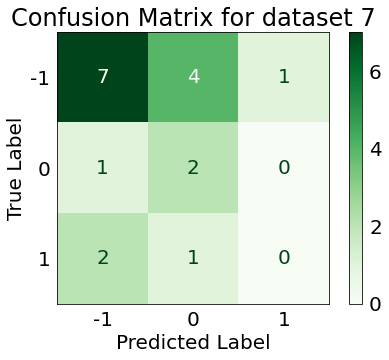


===================== Dataset 8 =====================
Accuracy score of dataset8 is :0.5333333333333333


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


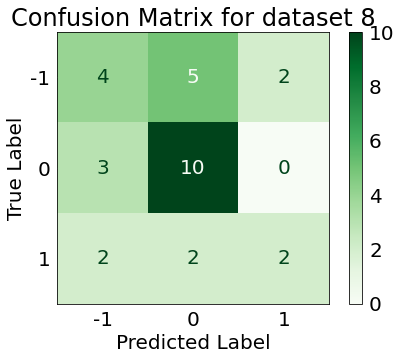


===================== Dataset 9 =====================
Accuracy score of dataset9 is :0.5333333333333333


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


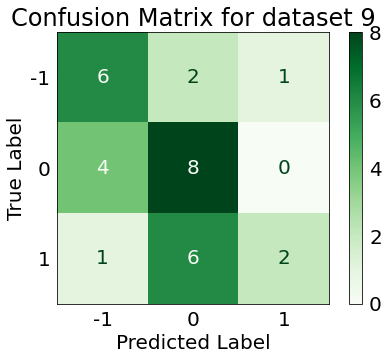

In [ ]:
rf_model2 = RandomForestClassifier()
multipleDataClassification2(1,9,rf_model2)

---

## 1.4) Post Analysis

#### tfidf


===================== Dataset 19 =====================


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LibLinear]Accuracy score of dataset19 is :0.5463414634146342


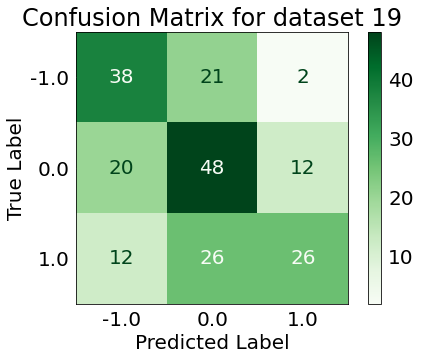

In [ ]:
multipleDataClassification(19,19,logR_model)


===================== Dataset 19 =====================
Accuracy score of dataset19 is :0.47317073170731705


/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


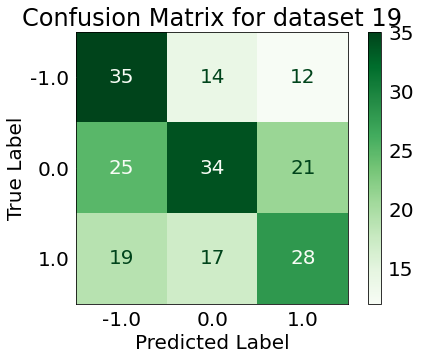

In [ ]:
multipleDataClassification(19,19,gnb_models)


===================== Dataset 19 =====================


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


Accuracy score of dataset19 is :0.4585365853658537


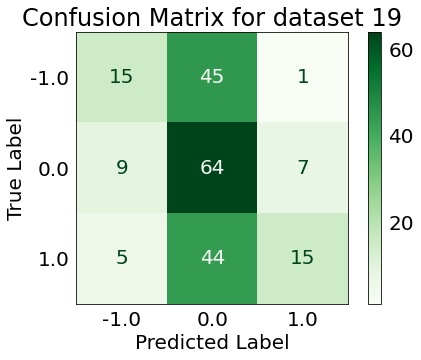

In [ ]:
multipleDataClassification(19,19,rf_model)

#### count vectorizer


===================== Dataset 19 =====================


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LibLinear]Accuracy score of dataset19 is :0.5414634146341464


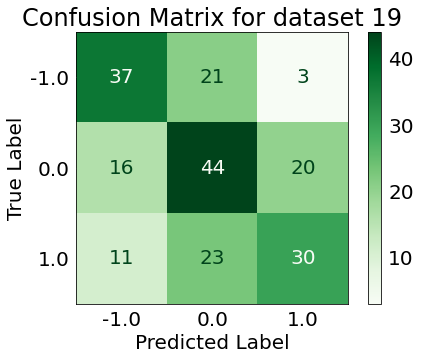

In [ ]:
multipleDataClassification2(19,19,logR_model2)


===================== Dataset 19 =====================
Accuracy score of dataset19 is :0.4585365853658537


/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


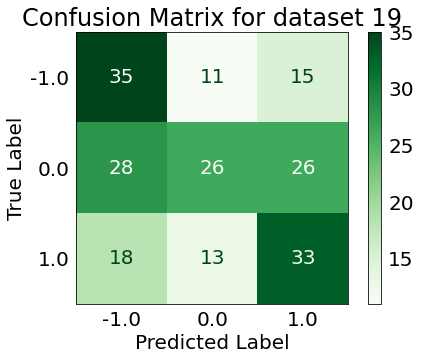

In [ ]:
multipleDataClassification2(19,19,gnb_model2)


===================== Dataset 19 =====================


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


Accuracy score of dataset19 is :0.45365853658536587


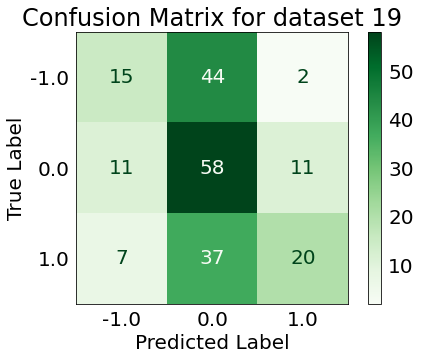

In [ ]:
multipleDataClassification2(19,19,rf_model2)

#with Malaya nltk

In [ ]:
!pip install malaya
!pip install youtokentome

In [2]:
import malaya

/usr/local/lib/python3.7/dist-packages/malaya/function/__init__.py:37: UserWarning: Cannot import beam_search_ops from Tensorflow Addons, `deep_model` for stemmer will not available to use, make sure Tensorflow Addons version >= 0.12.0
  'Cannot import beam_search_ops from Tensorflow Addons, `deep_model` for stemmer will not available to use, make sure Tensorflow Addons version >= 0.12.0'


In [36]:
malaya_model = malaya.sentiment.transformer(model='tiny-bert')
model = malaya.sentiment.multinomial()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ComplementNB from version 0.22.1 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator TfidfTransformer from version 0.22.1 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator TfidfVectorizer from version 0.22.1 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [56]:
datasets = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/tweets_data/for feature extraction/clean dataset/nanRemove/2.csv', index_col= False)
datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Raw       85 non-null     object
 1   CD-RE     85 non-null     object
 2   Polarity  85 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 2.1+ KB


In [51]:
#create a function to get polarity    
def getPolNomi(text):
    result = model.predict([text])
    for r in result:
      if (r == 'positive'):
        return 1
      elif (r =='negative'):
        return -1
      elif (r =='neutral'):
        return 0

#create a function to get polarity    
def getPolTinyBert(text):
    result = malaya_model.predict([text])
    for r in result:
      if (r == 'positive'):
        return 1
      elif (r =='negative'):
        return -1
      elif (r =='neutral'):
        return 0


In [64]:
datasets['nomiRaw'] = datasets['Raw'].apply(getPolNomi)
datasets['nomi'] = datasets['CD-RE'].apply(getPolNomi)
datasets['tinyBertRaw'] = datasets['Raw'].apply(getPolTinyBert)
datasets['tinyBert'] = datasets['CD-RE'].apply(getPolTinyBert)

In [65]:
datasets

,Raw,CD-RE,Polarity,nomi,tinyBert,nomiRaw,tinyBertRaw
0,The most handsome man in the world is Michael ...,lelaki tampan dunia michael ballack nigeria ke...,1,0,-1,1,1
1,Tn Hj Zainal tak pernah mengecewakan.\n#MakeSc...,tuan haji zainal tak mengecewakan,1,0,-1,0,-1
2,Brave girl. Not all people have the audacity t...,Gadis berani tidak orang mempunyai keberanian ...,1,0,-1,1,1
3,Also apa tindakan dari menteri utk pastikan #M...,tindakan menteri untuk pastikan menjadi realit...,0,-1,-1,0,1
4,@ant33ater He's talking about you from 10:00 t...,bercakap jam 10 00 15 00,0,-1,-1,1,1
...,...,...,...,...,...,...,...
80,Stop laa salahkan perempuan! Geram betul laa b...,stop laa salahkan geram perempuan laa baca kom...,-1,0,1,-1,-1
81,Five new stories are up and running on https:/...,lima kisah baru muncul terus berjalan sebahagi...,0,0,1,1,1
82,"if you choose silence, means that you’re suppo...",memilih diam bermaksud menyokong serangan seks...,-1,-1,-1,0,1
83,Kita bersolidariti dengan @ant33ater dan sanga...,bersolidariti penting mesej bawakan rogol jena...,1,-1,-1,-1,-1


In [70]:
target_tester = datasets['Polarity']
target_Predict1 = datasets['nomi']
target_Predict2 = datasets['tinyBert']
target_Predict3 = datasets['nomiRaw']
target_Predict4 = datasets['tinyBertRaw']


In [71]:
print('Accuracy score nomi : '+str( accuracy_score(target_tester,target_Predict1)))
print('Accuracy score tinyBert : '+str( accuracy_score(target_tester,target_Predict2)))
print('Accuracy score nomi raw : '+str( accuracy_score(target_tester,target_Predict3)))
print('Accuracy score tinyBert raw: '+str( accuracy_score(target_tester,target_Predict4)))

Accuracy score nomi : 0.49411764705882355
Accuracy score tinyBert : 0.4823529411764706
Accuracy score nomi raw : 0.4
Accuracy score tinyBert raw: 0.38823529411764707


In [63]:
datasets.drop(columns=['nomi',	'tinyBert'])

,Raw,CD-RE,Polarity
0,The most handsome man in the world is Michael ...,lelaki tampan dunia michael ballack nigeria ke...,1
1,Tn Hj Zainal tak pernah mengecewakan.\n#MakeSc...,tuan haji zainal tak mengecewakan,1
2,Brave girl. Not all people have the audacity t...,Gadis berani tidak orang mempunyai keberanian ...,1
3,Also apa tindakan dari menteri utk pastikan #M...,tindakan menteri untuk pastikan menjadi realit...,0
4,@ant33ater He's talking about you from 10:00 t...,bercakap jam 10 00 15 00,0
...,...,...,...
80,Stop laa salahkan perempuan! Geram betul laa b...,stop laa salahkan geram perempuan laa baca kom...,-1
81,Five new stories are up and running on https:/...,lima kisah baru muncul terus berjalan sebahagi...,0
82,"if you choose silence, means that you’re suppo...",memilih diam bermaksud menyokong serangan seks...,-1
83,Kita bersolidariti dengan @ant33ater dan sanga...,bersolidariti penting mesej bawakan rogol jena...,1


In [ ]:
|def multipleDataClassification(min_file,max_file,models):
  fp0 = '/content/drive/MyDrive/Colab Notebooks/tweets_data/for feature extraction/clean dataset/nanRemove/'
  
  for i in range(min_file,max_file+1):
    print('\n===================== Dataset '+str(i)+' =====================')
    fp1 = fp0+str(i)+'.csv'
    data = pd.read_csv(fp1,index_col= None)
    #classify
    (r,c) = data.shape
    x = data.iloc[:,0:(c-1)]
    y = data.iloc[:, (c-1):]``
    #splititng data
    feature_train, feature_test, target_train, target_test = train_test_split(x,y, test_size = 0.3, random_state = 42)
    
    #Fitting Models and Do Prediction
    models.fit(feature_train,target_train)
    target_pred = models.predict(feature_test)

    #print accuracy score
    print('Accuracy score of dataset'+str(i)+' is :'+str( accuracy_score(target_test,target_pred)))

    #view confusion matrix
    matrix = plot_confusion_matrix(models,feature_test, target_test, cmap= plt.cm.Greens)
    matrix.ax_.set_title('Confusion Matrix for dataset '+str(i), color='black')
    plt.xlabel('Predicted Label', color='black')
    plt.ylabel('True Label', color='black')
    plt.gcf().axes[0].tick_params(color='white')
    plt.gcf().axes[1].tick_params(color='white')
    plt.gcf().set_size_inches(7,5)
    plt.show()
    